In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.dates as mdates

In [2]:
df =  pd.read_parquet('logs.parquet')

In [3]:
añadir_pieza = df[(df['Evento'] == 'AÑADIR_PIEZA') & (df['diseñoid'] != -1) & (df['diseñoid'] != 0)].copy()
añadir_pieza = añadir_pieza[['pieza','diseñoid']]
print(f"Número total de transacciones: {añadir_pieza['diseñoid'].nunique()}")
print(f"Número total de ítems (productos): {añadir_pieza['pieza'].nunique()}")

Número total de transacciones: 1694
Número total de ítems (productos): 6981


count    1694.000000
mean       12.605667
std        15.135197
min         1.000000
25%         3.000000
50%         8.000000
75%        17.000000
90%        29.000000
max       213.000000
Name: pieza, dtype: float64

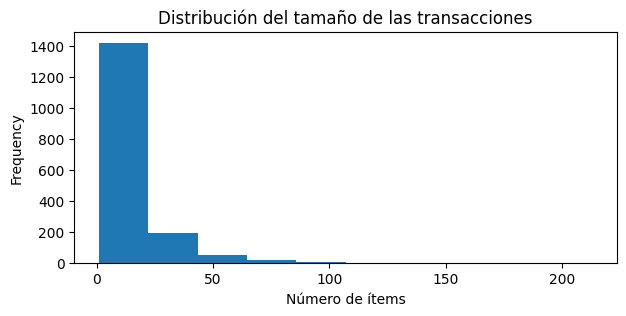

In [4]:
display(añadir_pieza.groupby('diseñoid')['pieza'].size().describe(percentiles=[.25, .5, .75, .9]))

fig, ax = plt.subplots(figsize=(7, 3))
añadir_pieza.groupby('diseñoid')['pieza'].size().plot.hist(ax=ax)
ax.set_title('Distribución del tamaño de las transacciones');
ax.set_xlabel('Número de ítems');

In [5]:
transacciones = añadir_pieza.groupby('diseñoid')['pieza'].apply(list).to_list()
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_transacciones = pd.DataFrame(te_ary, columns=te.columns_)
df_transacciones.head(5)

,0070,030,0600,0600_G,0P120,100,1000,1001,1003,1004,...,Z-912,Z-922,ZK110,ZK120,ZK180,ZK75,ZN102,ZN140,ZN60,ZN74
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
itemsets = apriori(df_transacciones, min_support=0.003, use_colnames=True)
itemsets['n_items'] = itemsets['itemsets'].apply(len)
itemsets.query('n_items >= 4').sort_values('support', ascending=False)

,support,itemsets,n_items


In [9]:
itemsets.query('n_items >= 2').sort_values('support', ascending=False)

,support,itemsets,n_items
714,0.023022,"(EE-VCR-01, EE-PILAR-01)",2
710,0.020071,"(EE-PILAR-01, EE-RAD-01)",2
728,0.018890,"(EE-VCR-01, EE-RAD-01)",2
615,0.017119,"(SGE-001, ED-PPC-02)",2
608,0.016529,"(SGE-001, ED-PPC-01)",2
...,...,...,...
346,0.003542,"(ED-ALF-02, ED-COR-01)",2
802,0.003542,"(ED-EST-01, EE-VBA-03, EE-PILAR-01)",3
803,0.003542,"(EE-VCR-01, EE-PILAR-01, ED-EST-01)",3
805,0.003542,"(ED-EST-01, EE-PILAR-01, SGE-004)",3
